# Diabetes Prediction

In [1]:
from google.colab import files

files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahoorshams","key":"2b5ec3a9e9700362b646e3b095c12b8d"}'}

In [11]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [13]:
!pip install -q kaggle


In [14]:
!kaggle datasets download -d sandeep2812/pimaindiansdiabetes


Dataset URL: https://www.kaggle.com/datasets/sandeep2812/pimaindiansdiabetes
License(s): unknown
pimaindiansdiabetes.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
import zipfile

with zipfile.ZipFile("pimaindiansdiabetes.zip", "r") as zip_ref:
    print(zip_ref.namelist())



['pima-indians-diabetes.data']


In [20]:
import pandas as pd
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
    "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

df = pd.read_csv("diabetes_data/pima-indians-diabetes.data", names=columns)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
# Shape and info
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())


Shape: (768, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
cols_with_possible_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_possible_zeros:
    num_zeros = (df[col] == 0).sum()
    print(f"{col} has {num_zeros} zero(s)")


Glucose has 5 zero(s)
BloodPressure has 35 zero(s)
SkinThickness has 227 zero(s)
Insulin has 374 zero(s)
BMI has 11 zero(s)


In [24]:
import numpy as np

df[cols_with_possible_zeros] = df[cols_with_possible_zeros].replace(0, np.nan)

# Impute with median
df.fillna(df.median(), inplace=True)


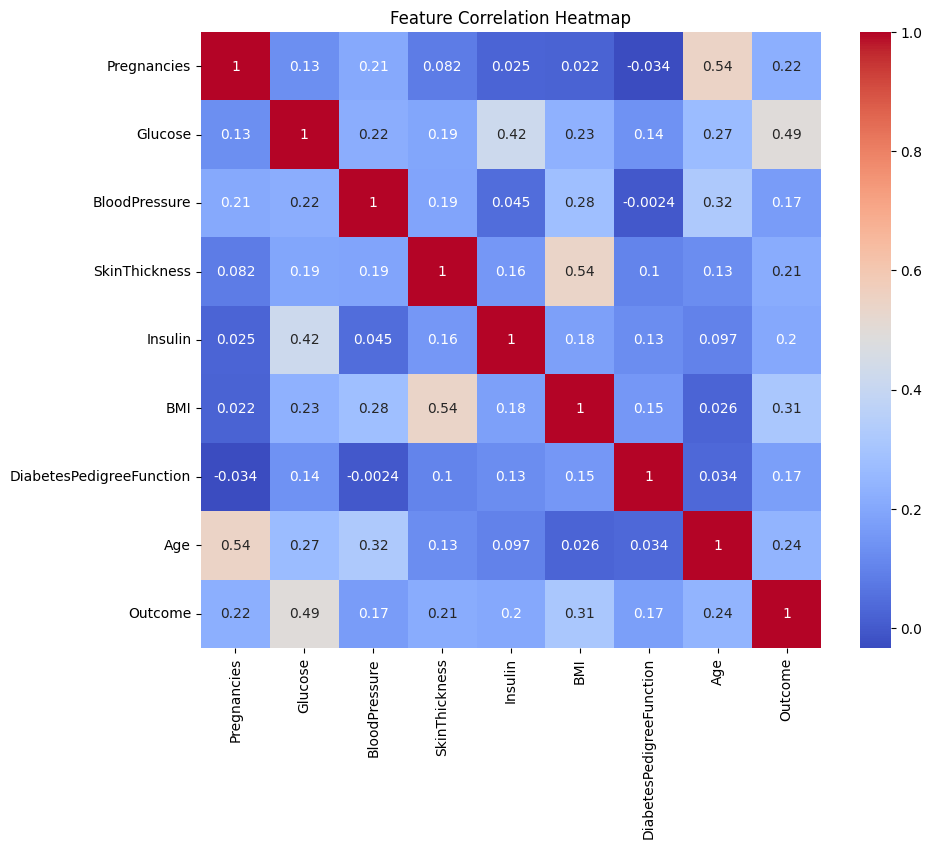

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


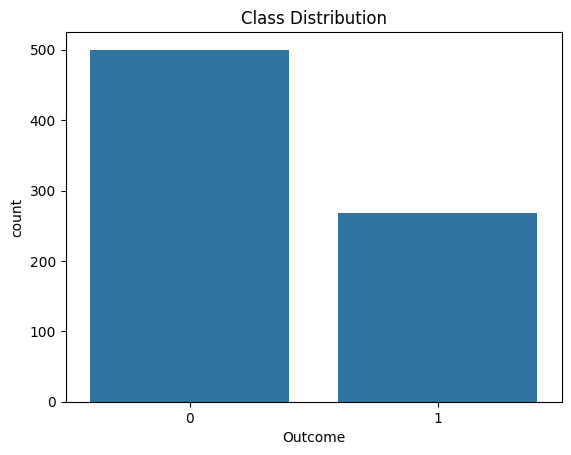

In [27]:
sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution")
plt.show()


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n🔹 {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    if y_proba is not None:
        print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [36]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
evaluate_model("Logistic Regression", log_reg, X_test_scaled, y_test)



🔹 Logistic Regression
Accuracy: 0.7077922077922078
Precision: 0.6
Recall: 0.5
F1 Score: 0.5454545454545454
ROC AUC: 0.812962962962963
Confusion Matrix:
 [[82 18]
 [27 27]]


In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
evaluate_model("Logistic Regression", log_reg, X_test_scaled, y_test)



🔹 Logistic Regression
Accuracy: 0.7077922077922078
Precision: 0.6
Recall: 0.5
F1 Score: 0.5454545454545454
ROC AUC: 0.812962962962963
Confusion Matrix:
 [[82 18]
 [27 27]]


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # No need to scale
evaluate_model("Random Forest", rf, X_test, y_test)



🔹 Random Forest
Accuracy: 0.7792207792207793
Precision: 0.7272727272727273
Recall: 0.5925925925925926
F1 Score: 0.6530612244897959
ROC AUC: 0.8191666666666666
Confusion Matrix:
 [[88 12]
 [22 32]]


In [39]:
!pip install -q xgboost

from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
evaluate_model("XGBoost", xgb, X_test, y_test)



🔹 XGBoost
Accuracy: 0.7662337662337663
Precision: 0.68
Recall: 0.6296296296296297
F1 Score: 0.6538461538461539
ROC AUC: 0.8203703703703704
Confusion Matrix:
 [[84 16]
 [20 34]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:45:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [40]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
evaluate_model("SVM", svm, X_test_scaled, y_test)



🔹 SVM
Accuracy: 0.7402597402597403
Precision: 0.6521739130434783
Recall: 0.5555555555555556
F1 Score: 0.6
ROC AUC: 0.7963888888888889
Confusion Matrix:
 [[84 16]
 [24 30]]


In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [42]:
def plot_roc_curve(models, X_test, y_test, model_names):
    plt.figure(figsize=(10, 8))

    for i, model in enumerate(models):
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            # For models like SVM, use decision function
            y_proba = model.decision_function(X_test)

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (AUC = {roc_auc:.2f})')

    # Plot the "no skill" line (diagonal line)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray')

    plt.title('ROC Curve Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:46:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


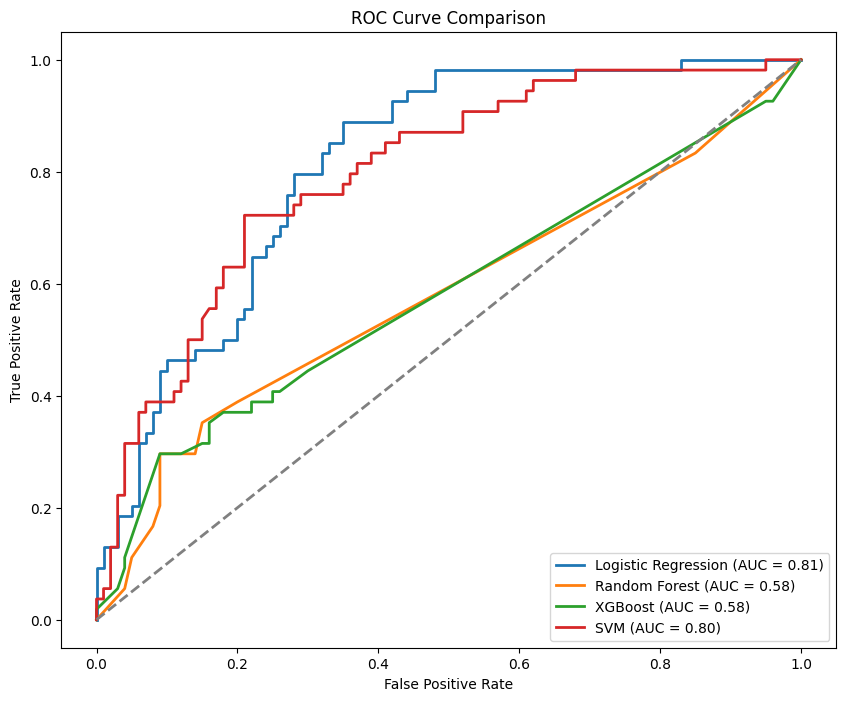

In [43]:
# Train all models
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# List of models
models = [log_reg, rf, xgb, svm]
model_names = ["Logistic Regression", "Random Forest", "XGBoost", "SVM"]

# Plot ROC curve comparison
plot_roc_curve(models, X_test_scaled, y_test, model_names)


In [44]:
from sklearn.model_selection import GridSearchCV

# Random Forest hyperparameters
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,
                              n_jobs=-1,
                              verbose=2,
                              scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

# Use the best model to make predictions
best_rf = grid_search_rf.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Score for Random Forest: 0.7736505397840863


In [45]:
# XGBoost hyperparameters
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                               param_grid=param_grid_xgb,
                               cv=5,
                               n_jobs=-1,
                               verbose=2,
                               scoring='accuracy')

# Fit GridSearchCV on the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Score for XGBoost:", grid_search_xgb.best_score_)

# Use the best model to make predictions
best_xgb = grid_search_xgb.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best Score for XGBoost: 0.7720378515260563


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:54:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [46]:
# Evaluate the best models
evaluate_model("Best Random Forest", best_rf, X_test, y_test)
evaluate_model("Best XGBoost", best_xgb, X_test, y_test)



🔹 Best Random Forest
Accuracy: 0.7532467532467533
Precision: 0.6739130434782609
Recall: 0.5740740740740741
F1 Score: 0.62
ROC AUC: 0.8137037037037037
Confusion Matrix:
 [[85 15]
 [23 31]]

🔹 Best XGBoost
Accuracy: 0.7337662337662337
Precision: 0.6444444444444445
Recall: 0.5370370370370371
F1 Score: 0.5858585858585859
ROC AUC: 0.817962962962963
Confusion Matrix:
 [[84 16]
 [25 29]]


In [47]:
import joblib

# Save the trained model
joblib.dump(best_xgb, 'diabetes_model.pkl')


['diabetes_model.pkl']